In [120]:
library(here)
library(dplyr)
library(ggplot2)
library(purrr)
library(tibble)

In [121]:
gtex_plier <- readRDS(here('output/vignettes/plier2_testing/gtex_PLIER.rds'))
gtex_plier2 <- readRDS(here('output/vignettes/plier2_testing/gtex_PLIER2.rds'))

In [122]:
tail(rownames(gtex_plier$Z))
tail(rownames(gtex_plier2$Z))

[1] NA NA NA NA NA NA

[1] NA NA NA NA NA NA

# L

In [123]:
message('L PLIER')
gtex_plier$L1
gtex_plier$L2
gtex_plier$L3

message('L PLIER2')
gtex_plier2$L1
gtex_plier2$L2
gtex_plier2$L3

L PLIER



[1] 32.40655

[1] 64.81309

[1] 7.485183e-05

L PLIER2



[1] 21.60436

[1] 64.81309

NULL

# SUMMARY

In [124]:
# make sure it’s a plain data.frame
sum2 <- as.data.frame(gtex_plier2$summary)

# counts
n_fdr   <- sum(sum2$FDR   < 0.05, na.rm=TRUE)
n_auc   <- sum(sum2$AUC   > 0.7,  na.rm=TRUE)
n_both  <- sum(sum2$FDR   < 0.05 & sum2$AUC > 0.7, na.rm=TRUE)

data.frame(
  criterion    = c("FDR < 0.05", "AUC > 0.7", "both"),
  count        = c(n_fdr,       n_auc,       n_both)
)


criterion  count
1 FDR < 0.05 1    
2 AUC > 0.7  1    
3 both       0

In [125]:
message('Summary PLIER')

gtex_plier_summary  <- data.frame(gtex_plier$summary)
colnames(gtex_plier_summary) <- c('pathway', 'LV', 'AUC', 'pvalue', 'FDR')

n_fdr   <- sum(gtex_plier_summary$FDR   < 0.05, na.rm=TRUE)
n_auc   <- sum(gtex_plier_summary$AUC   > 0.7,  na.rm=TRUE)
n_both  <- sum(gtex_plier_summary$FDR   < 0.05 & gtex_plier_summary$AUC > 0.7, na.rm=TRUE)

data.frame(
  criterion    = c("FDR < 0.05", "AUC > 0.7", "both"),
  count        = c(n_fdr,       n_auc,       n_both)
)

message('Summary PLIER2')

gtex_plier2_summary  <- data.frame(gtex_plier2$summary)
colnames(gtex_plier2_summary) <- c('pathway', 'LV', 'AUC', 'pvalue', 'FDR')

n_fdr   <- sum(gtex_plier2_summary$FDR   < 0.05, na.rm=TRUE)
n_auc   <- sum(gtex_plier2_summary$AUC   > 0.7,  na.rm=TRUE)
n_both  <- sum(gtex_plier2_summary$FDR   < 0.05 & gtex_plier2_summary$AUC > 0.7, na.rm=TRUE)

data.frame(
  criterion    = c("FDR < 0.05", "AUC > 0.7", "both"),
  count        = c(n_fdr,       n_auc,       n_both)
)

Summary PLIER



criterion  count
1 FDR < 0.05 0    
2 AUC > 0.7  1    
3 both       0

Summary PLIER2



criterion  count
1 FDR < 0.05 1    
2 AUC > 0.7  1    
3 both       0

In [126]:
message('Shared LVs between PLIER and PLIER2')

shared_lvs <- gtex_plier_summary[c('pathway', 'LV')]  %>% 
    dplyr::inner_join(gtex_plier2_summary[c('pathway', 'LV')])

head(shared_lvs)

message('Number of shared pathways-LVs: ', nrow(shared_lvs))
message('Number of LVs in pathways-PLIER: ', nrow(gtex_plier_summary))
message('Number of LVs in pathways-PLIER2: ', nrow(gtex_plier2_summary))

Shared LVs between PLIER and PLIER2

Joining with `by = join_by(pathway, LV)`


pathway                                            LV
1 Type I Spiral Ganglion Neuron Brain Mouse          7 
2 Leydig Cell Fetal Gonad Human                      19
3 Meiotic Prophase Fetal Germ Cell Fetal Gonad Human 19
4 SLC16A7+ Cell Lung Human                           19
5 Oogenesis Phase Fetal Germ Cell Fetal Gonad Human  20
6 Paneth Cell Intestinal Crypt Mouse                 20

Number of shared pathways-LVs: 50

Number of LVs in pathways-PLIER: 440

Number of LVs in pathways-PLIER2: 296



# Z

In [127]:
gtex_plier_Z  <- data.frame(gtex_plier$Z)
colnames(gtex_plier_Z)  <- paste0('LV', 1:ncol(gtex_plier_Z))
head(gtex_plier_Z)

LV1         LV2        LV3        LV4         LV5        
RP11.34P13.15 0.020161323 0.00000000 0.11211942 0.001369271 0.136005832
MTCO3P12      0.006506879 0.36395875 0.27492069 0.118450200 0.071888358
RP11.206L10.2 0.000000000 0.38310504 0.22340211 0.129929758 0.096312619
NOC2L         0.000000000 0.07052365 0.00000000 0.062421936 0.100092279
B3GALT6       0.420323129 0.00000000 0.09597922 0.000000000 0.007324695
C1QTNF12      0.090534235 0.07328543 0.00000000 0.000000000 0.020310602
              LV6        LV7        LV8        LV9       LV10       ⋯
RP11.34P13.15 0.05711895 0.00000000 0.01293293 0.0000000 0.04777929 ⋯
MTCO3P12      0.00000000 0.06398066 0.13853088 0.0172472 0.00000000 ⋯
RP11.206L10.2 0.00000000 0.06966409 0.13749786 0.0659610 0.00000000 ⋯
NOC2L         0.00000000 0.00000000 0.07482906 0.0000000 0.00000000 ⋯
B3GALT6       0.00000000 0.01502024 0.00000000 0.0000000 0.00000000 ⋯
C1QTNF12      0.00000000 0.00000000 0.00000000 0.0000000 0.11940737 ⋯
              LV191      LV192      LV193     LV194        LV195     
RP11.34P13.15 0.09579021 0.04333212 0.0000000 0.000000e+00 0.10242768
MTCO3P12      0.11887933 0.00000000 0.0000000 0.000000e+00 0.09139022
RP11.206L10.2 0.19277267 0.00000000 0.0000000 0.000000e+00 0.07536520
NOC2L         0.19690028 0.00000000 0.0227483 2.772025e-02 0.07912001
B3GALT6       0.00000000 0.11440025 0.0000000 9.199662e-05 0.07821981
C1QTNF12      0.00000000 0.00000000 0.4518168 0.000000e+00 0.13924188
              LV196      LV197     LV198      LV199     LV200    
RP11.34P13.15 0.00000000 0.2483811 0.09067999 0.0000000 0.0000000
MTCO3P12      0.00000000 0.0000000 0.00000000 0.1948113 0.0661076
RP11.206L10.2 0.04417868 0.0000000 0.00000000 0.1964625 0.1107364
NOC2L         0.02226487 0.0000000 0.00000000 0.0000000 0.1454696
B3GALT6       0.00000000 0.6100643 0.06345416 0.0000000 0.1210238
C1QTNF12      0.00000000 0.0130681 0.00000000 0.0000000 0.0000000

In [128]:
gtex_plier2_Z <- as.data.frame(as.matrix(gtex_plier2$Z))
colnames(gtex_plier2_Z)  <- paste0('LV', 1:ncol(gtex_plier_Z))
head(gtex_plier2_Z)

LV1         LV2        LV3        LV4       LV5        LV6       
RP11.34P13.15 0.000000000 0.00000000 0.03335896 0.0000000 0.17464838 0.05278095
MTCO3P12      0.004327735 0.33078437 0.10244128 0.0000000 0.03503203 0.00000000
RP11.206L10.2 0.000000000 0.31406758 0.07177045 0.0000000 0.05128642 0.00000000
NOC2L         0.000000000 0.14629636 0.08832960 0.0000000 0.11254705 0.00000000
B3GALT6       1.545140379 0.04099874 0.00000000 0.0000000 0.00000000 0.13148851
C1QTNF12      0.194935948 0.00000000 0.00000000 0.0552653 0.00000000 0.00000000
              LV7        LV8         LV9       LV10       ⋯ LV191     
RP11.34P13.15 0.04344382 0.012904966 0.0109562 0.00000000 ⋯ 0.01720974
MTCO3P12      0.23168791 0.220800658 0.0000000 0.00000000 ⋯ 0.07763356
RP11.206L10.2 0.24097227 0.219524308 0.0000000 0.02643436 ⋯ 0.04147802
NOC2L         0.00000000 0.115776798 0.0000000 0.00000000 ⋯ 0.00000000
B3GALT6       0.00000000 0.007831646 0.1062310 0.00000000 ⋯ 0.00000000
C1QTNF12      0.00000000 0.020486896 0.0000000 0.05863545 ⋯ 0.00000000
              LV192        LV193      LV194      LV195     LV196      
RP11.34P13.15 0.0964132102 0.10336691 0.00000000 0.3043345 0.006144748
MTCO3P12      0.0000000000 0.08690047 0.00000000 0.1675956 0.000000000
RP11.206L10.2 0.0001040804 0.09376468 0.02637533 0.0000000 0.000000000
NOC2L         0.1659378322 0.00000000 0.17347250 0.0000000 0.079555154
B3GALT6       0.0000000000 0.00000000 0.05183628 0.0000000 0.000000000
C1QTNF12      0.0000000000 0.08514713 0.14534361 0.0216417 0.133204109
              LV197      LV198      LV199       LV200     
RP11.34P13.15 0.66813927 0.00000000 0.000000000 0.00000000
MTCO3P12      0.00000000 0.08218211 0.029884747 0.00000000
RP11.206L10.2 0.00000000 0.09078950 0.045915484 0.00000000
NOC2L         0.00000000 0.08268153 0.148346374 0.00000000
B3GALT6       1.31100145 0.17340532 0.000000000 0.08467400
C1QTNF12      0.07625861 0.00000000 0.003345876 0.04325096

## Pearson

LV   Pearson_correlation
LV8  LV8  0.9788185          
LV40 LV40 0.9768503          
LV83 LV83 0.9758291          
LV43 LV43 0.9620459          
LV44 LV44 0.9551072          
LV26 LV26 0.9459343

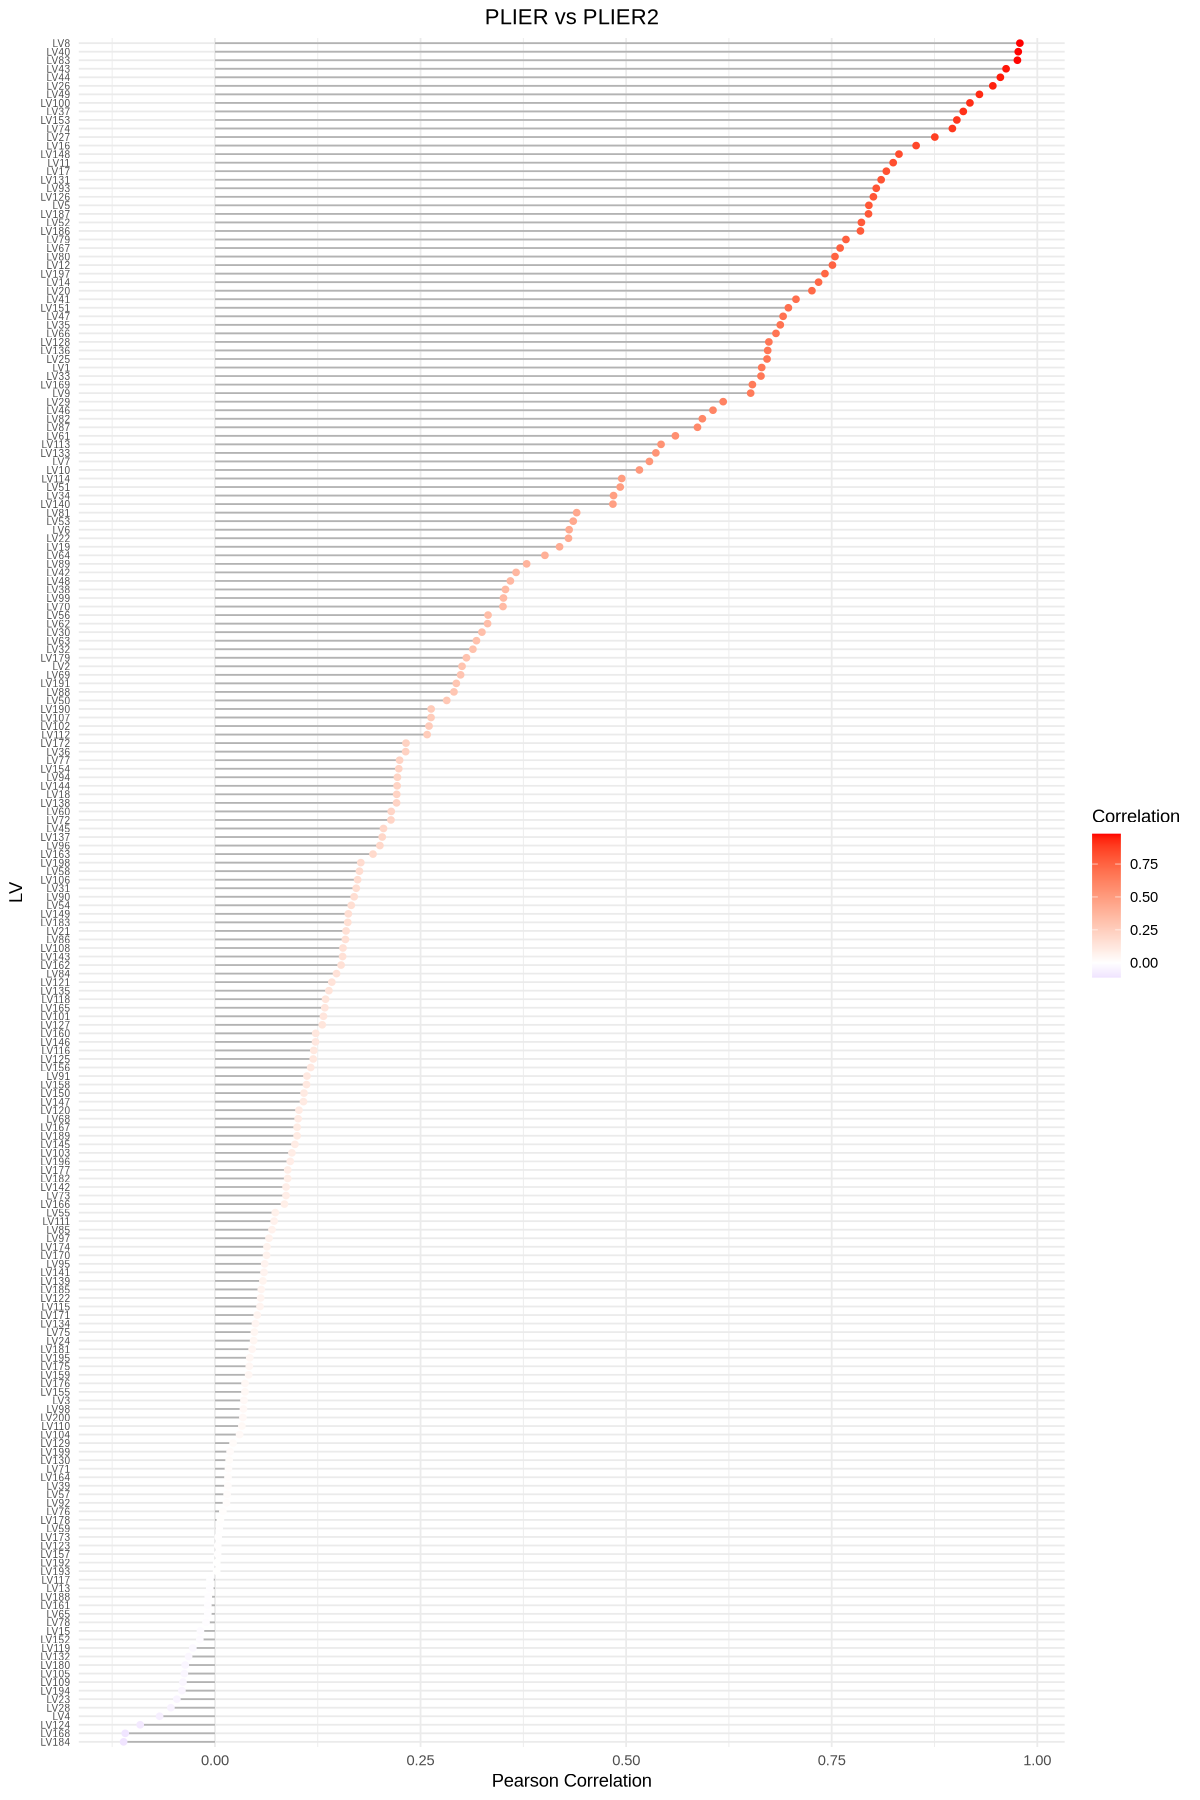

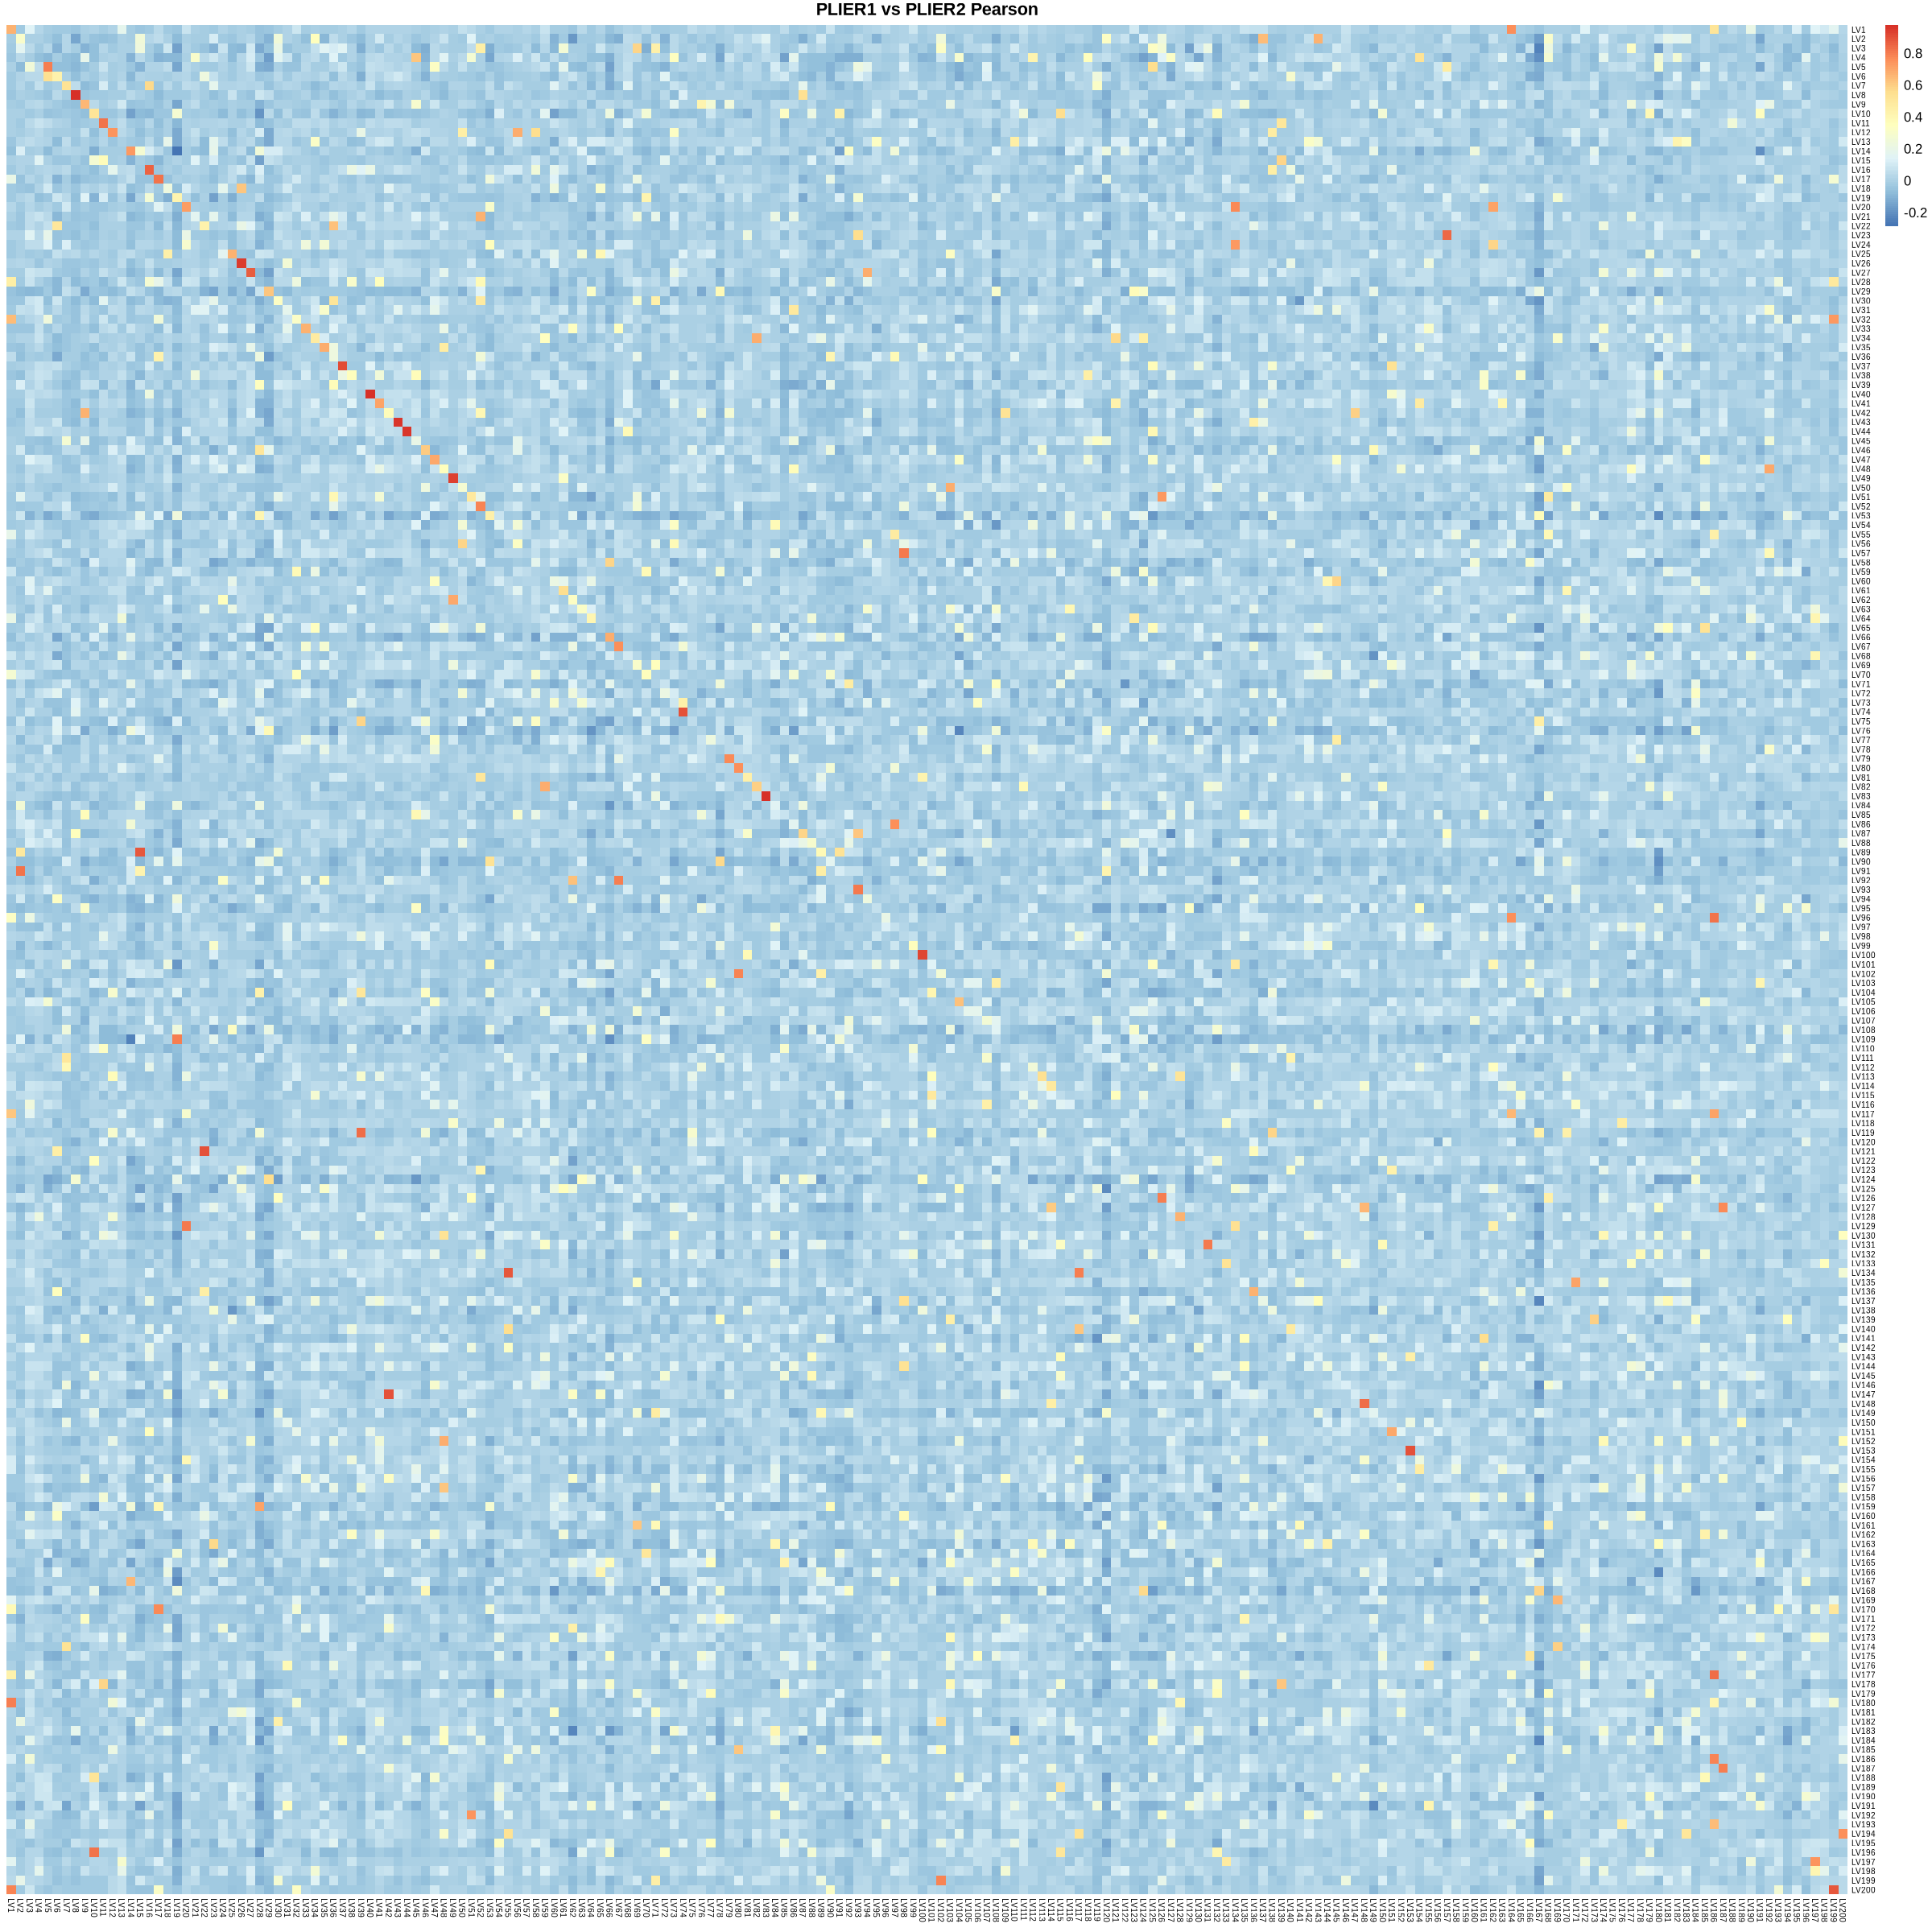

In [129]:
m1 <- as.matrix(as.data.frame(gtex_plier_Z))
m2 <- as.matrix(as.data.frame(gtex_plier2_Z))

lv_names <- intersect(colnames(m1), colnames(m2))
cor_lv_pearson <- sapply(lv_names, function(lv) cor(m1[, lv], m2[, lv], method = "pearson"))
cor_df_pearson <- data.frame(LV = lv_names, Pearson_correlation = cor_lv_pearson)

head(cor_df_pearson  %>%  arrange(desc(Pearson_correlation)))

options(repr.plot.width=10, repr.plot.height=15)

cor_df_pearson <- cor_df_pearson[order(cor_df_pearson$Pearson_correlation), ]
cor_df_pearson$LV <- factor(cor_df_pearson$LV, levels = cor_df$LV)

ggplot(cor_df_pearson, aes(x = LV, y = Pearson_correlation)) +
  geom_segment(aes(x = LV, xend = LV, y = 0, yend = Pearson_correlation), color = "grey70") +
  geom_point(aes(color = Pearson_correlation)) +
  scale_color_gradient2(midpoint = 0, low = "blue", mid = "white", high = "red") +
  scale_size_continuous(range = c(1, 4)) +
  coord_flip() +  
  labs(
    title = "PLIER vs PLIER2",
    x     = "LV",
    y     = "Pearson Correlation",
    color = "Correlation",
  ) +
  theme_minimal() +
  theme(
    plot.title   = element_text(hjust = 0.5),
    axis.text.y  = element_text(size = 6),
    axis.title.y = element_text(margin = margin(r = 10))
  ) 

options(repr.plot.width=20, repr.plot.height=20)

cors_pearson <- cor(m1, m2, method = "pearson")

pheatmap(
  cors_pearson,
  cluster_rows    = FALSE,
  cluster_cols    = FALSE,
  show_rownames   = TRUE,
  show_colnames   = TRUE,
  main            = "PLIER1 vs PLIER2 Pearson",
  fontsize_row    = 6,
  fontsize_col    = 6
)

## Spearman

LV   Spearman_correlation
LV8  LV8  0.9347326           
LV43 LV43 0.8893793           
LV40 LV40 0.8836478           
LV83 LV83 0.8432403           
LV26 LV26 0.8313586           
LV44 LV44 0.7993205

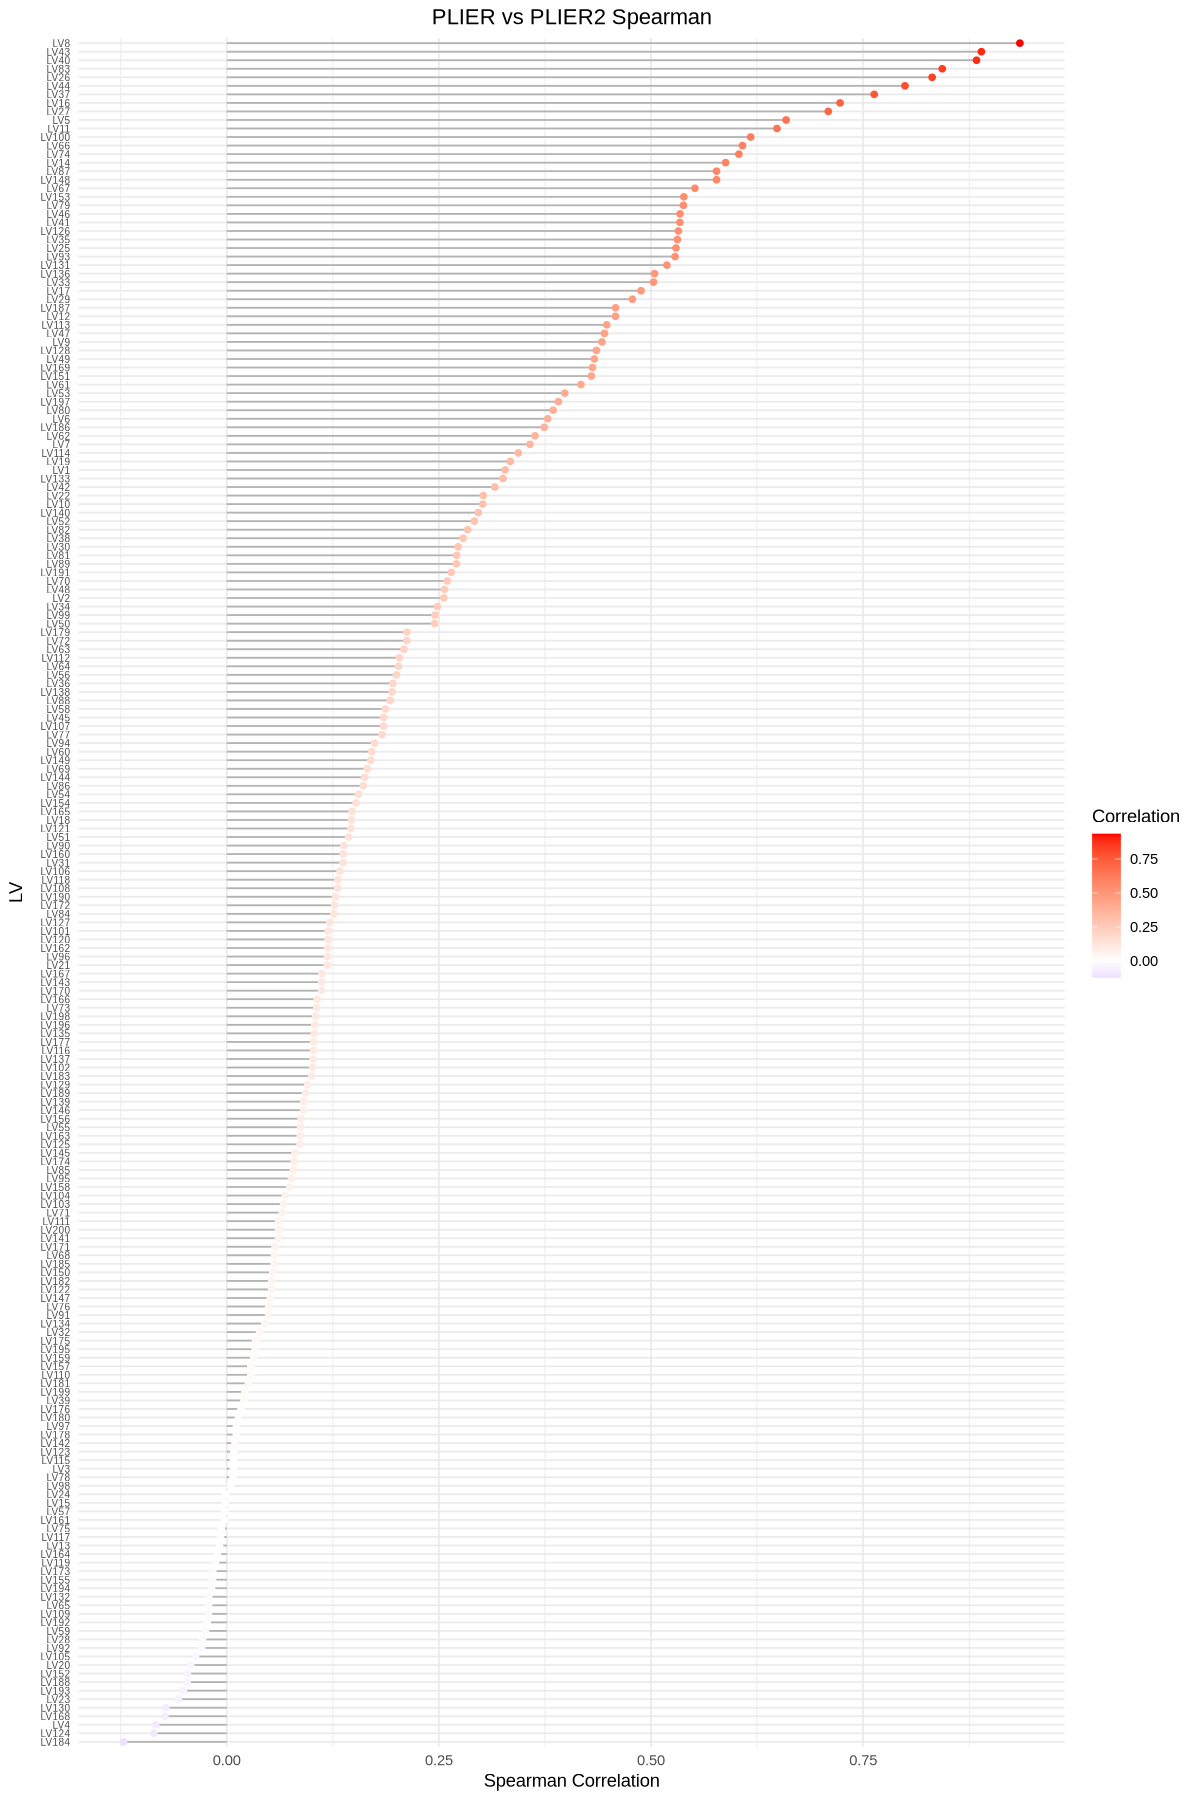

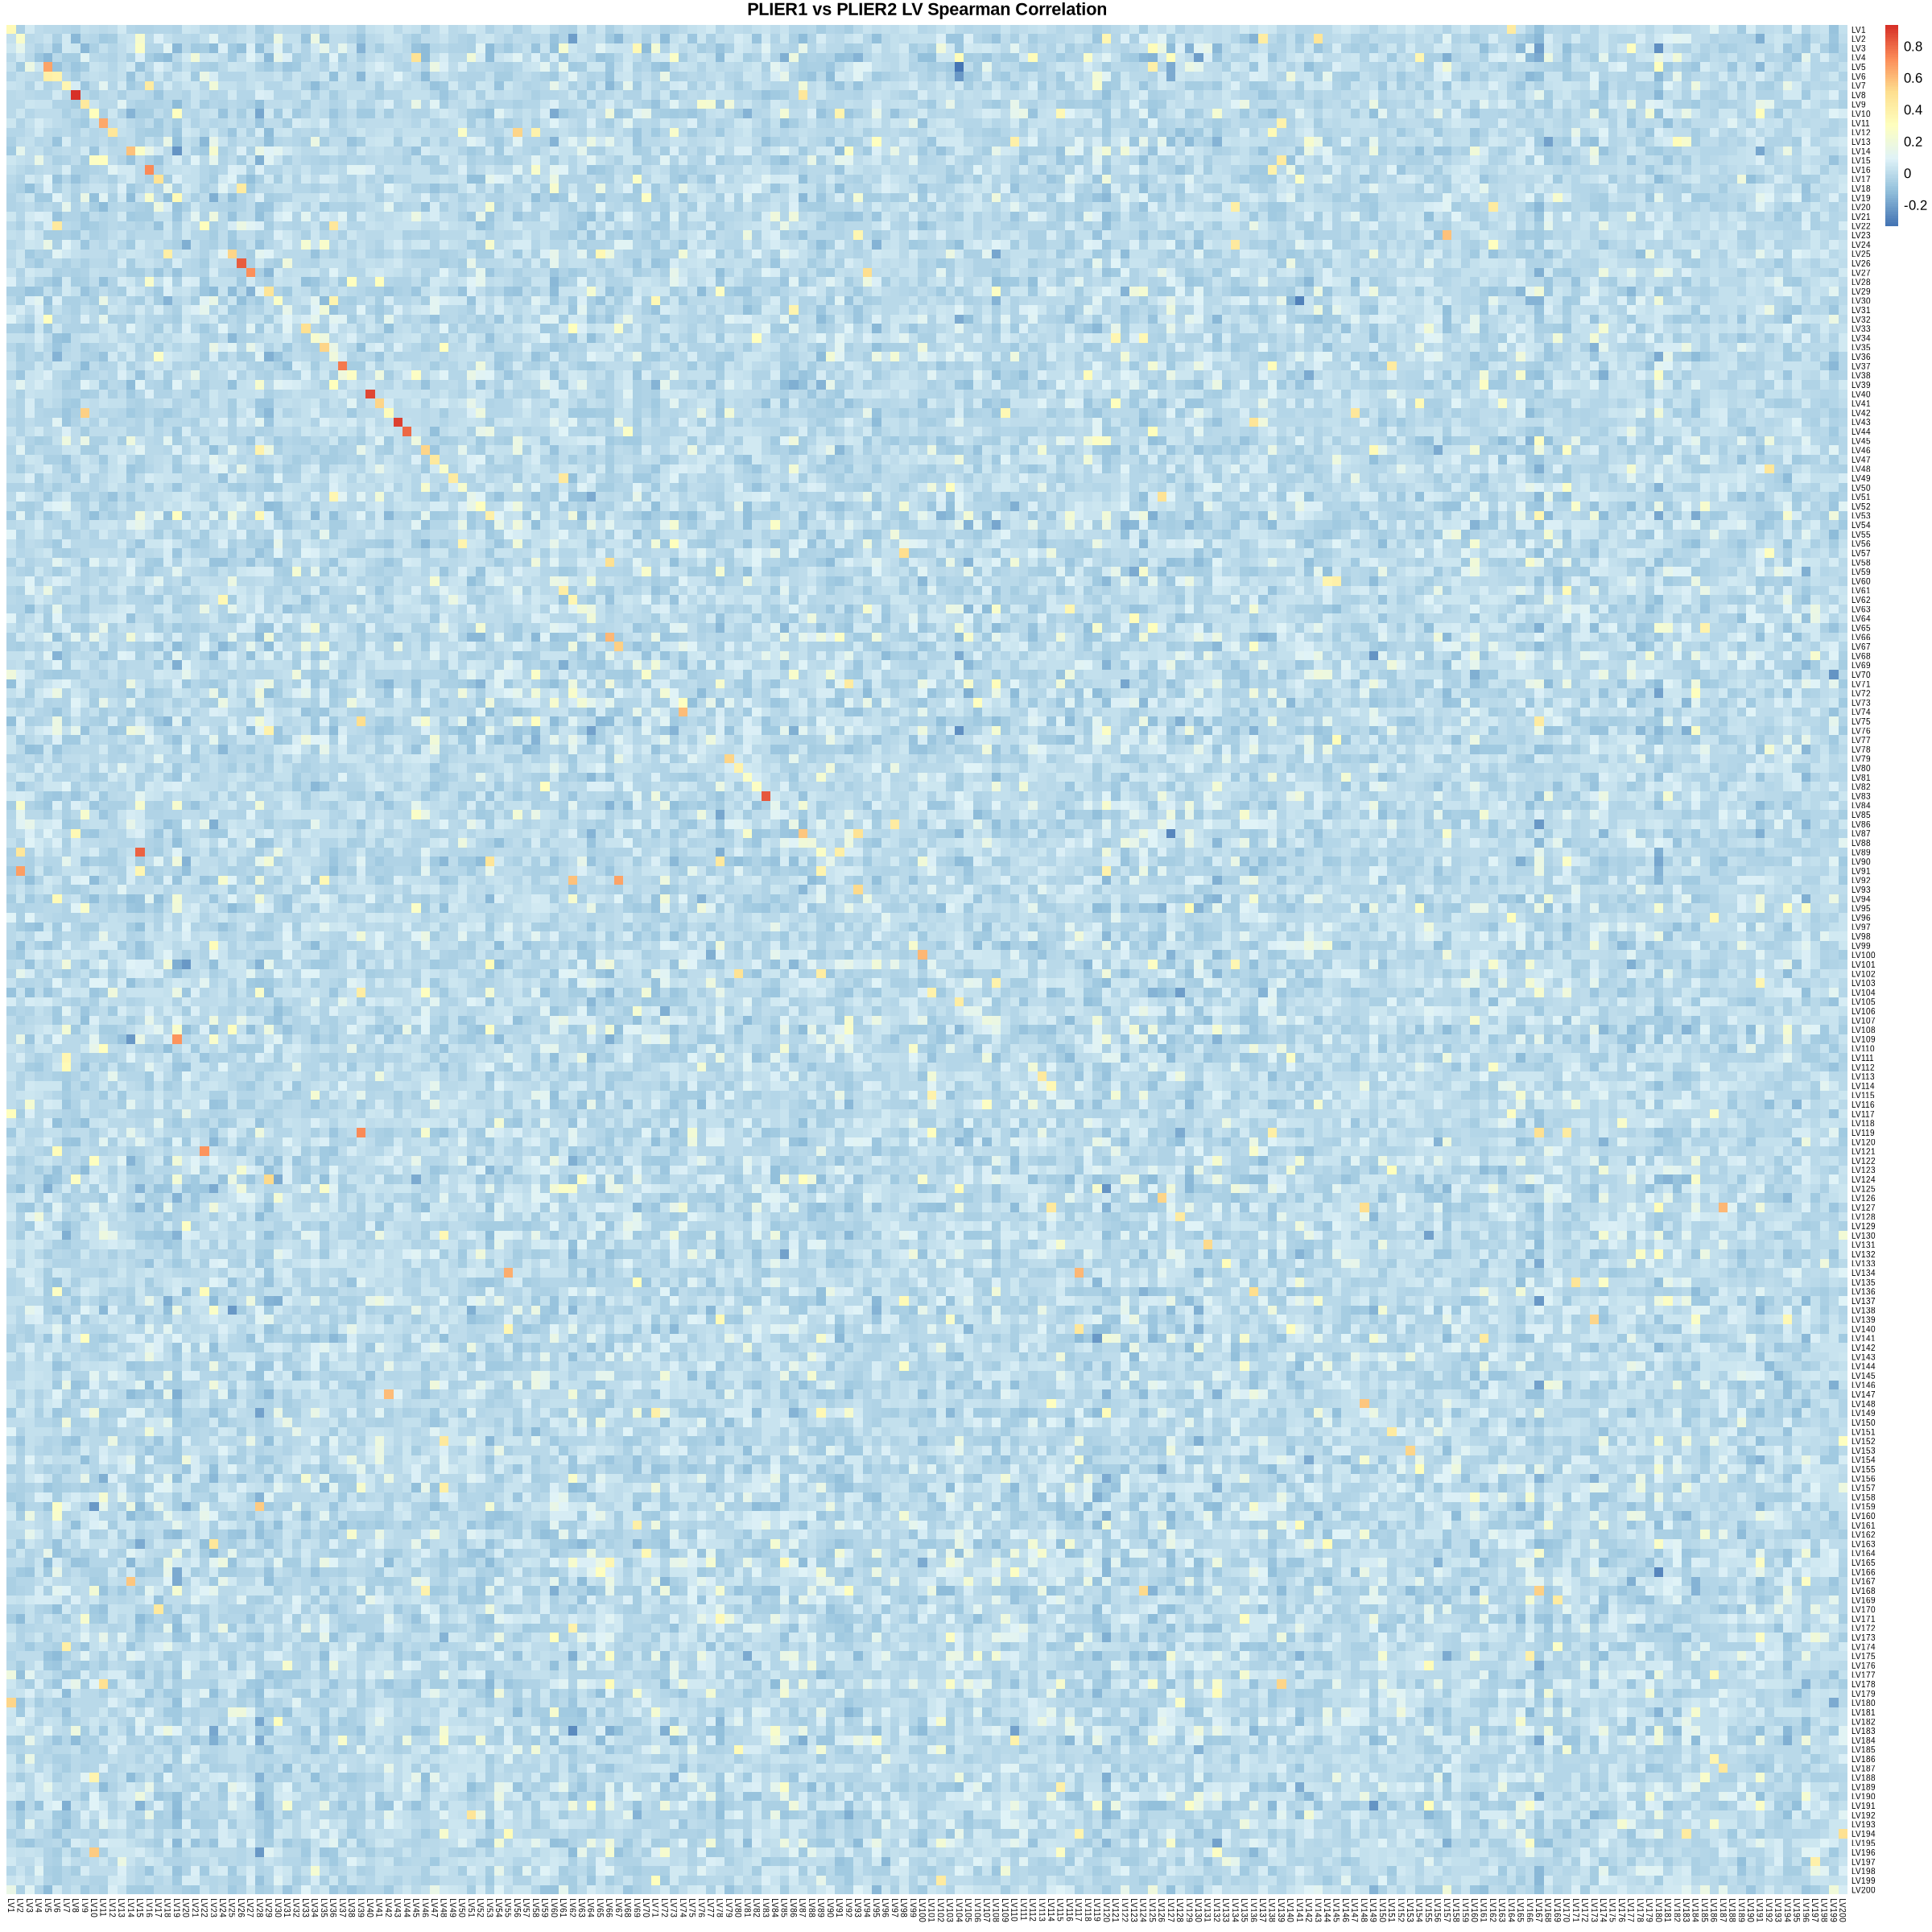

In [130]:
cor_lv_spearman <- sapply(lv_names, function(lv) cor(m1[, lv], m2[, lv], method = "spearman"))
cor_df_spearman <- data.frame(LV = lv_names, Spearman_correlation = cor_lv_spearman)
cor_df_spearman <- cor_df_spearman[order(cor_df_spearman$Spearman_correlation), ]
cor_df_spearman$LV <- factor(cor_df_spearman$LV, levels = cor_df_spearman$LV)

head(cor_df_spearman  %>%  arrange(desc(Spearman_correlation)))

options(repr.plot.width = 10, repr.plot.height = 15)

ggplot(cor_df_spearman, aes(x = LV, y = Spearman_correlation)) +
  geom_segment(aes(x = LV, xend = LV, y = 0, yend = Spearman_correlation), color = "grey70") +
  geom_point(aes(color = Spearman_correlation)) +
  scale_color_gradient2(midpoint = 0, low = "blue", mid = "white", high = "red") +
  scale_size_continuous(range = c(1, 4)) +
  coord_flip() +
  labs(title = "PLIER vs PLIER2 Spearman", x = "LV", y = "Spearman Correlation", color = "Correlation") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.y = element_text(size = 6), axis.title.y = element_text(margin = margin(r = 10)))

options(repr.plot.width = 20, repr.plot.height = 20)
cors_spearman <- cor(m1, m2, method = "spearman")
pheatmap(cors_spearman, cluster_rows = FALSE, cluster_cols = FALSE, show_rownames = TRUE, show_colnames = TRUE, main = "PLIER1 vs PLIER2 LV Spearman Correlation", fontsize_row = 6, fontsize_col = 6)


## Jaccard

LV    Jaccard  
1 LV100 0.9217877
2 LV83  0.8594595
3 LV40  0.7823834
4 LV17  0.7641026
5 LV43  0.7641026
6 LV74  0.7551020

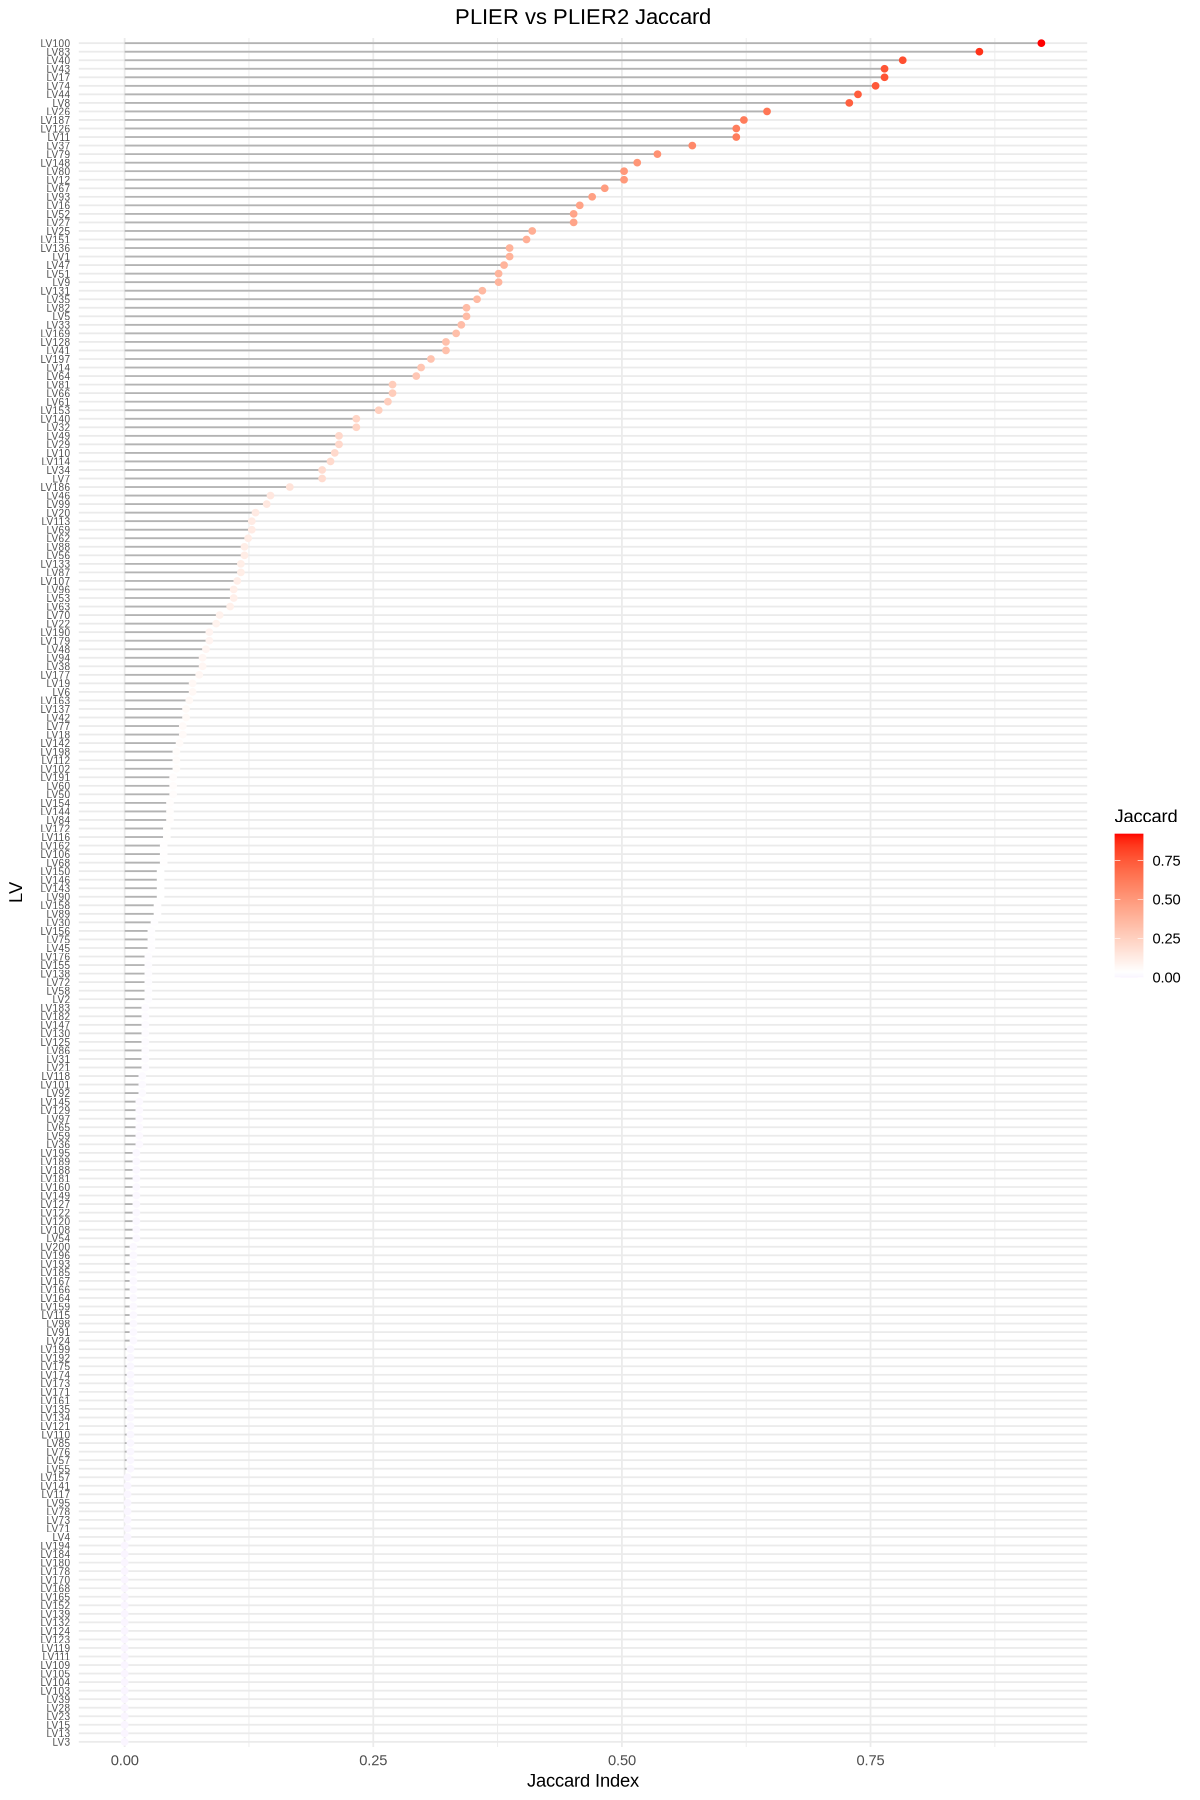

In [131]:
lv_names <- colnames(gtex_plier_Z)
top_n <- ceiling(0.01 * nrow(gtex_plier_Z))
jaccard_index <- function(x, y) length(intersect(x, y)) / length(union(x, y))

cor_df_jaccard <- map_dfr(lv_names, function(lv) {
  top1 <- gtex_plier_Z %>%
    rownames_to_column("gene") %>%
    arrange(desc(.data[[lv]])) %>%
    slice_head(n = top_n) %>%
    pull(gene)
  top2 <- gtex_plier2_Z %>%
    rownames_to_column("gene") %>%
    arrange(desc(.data[[lv]])) %>%
    slice_head(n = top_n) %>%
    pull(gene)
  tibble(LV = lv, Jaccard = jaccard_index(top1, top2))
})

head(cor_df_jaccard %>%  arrange(desc(Jaccard)))

cor_df_jaccard <- cor_df_jaccard[order(cor_df_jaccard$Jaccard), ]
cor_df_jaccard$LV <- factor(cor_df_jaccard$LV, levels = cor_df_jaccard$LV)

options(repr.plot.width=10, repr.plot.height=15)
ggplot(cor_df_jaccard, aes(x = LV, y = Jaccard)) +
  geom_segment(aes(x = LV, xend = LV, y = 0, yend = Jaccard), color = "grey70") +
  geom_point(aes(color = Jaccard)) +
  scale_color_gradient2(midpoint = median(cor_df_jaccard$Jaccard), low = "blue", mid = "white", high = "red") +
  scale_size_continuous(range = c(1, 4)) +
  coord_flip() +
  labs(
    title = "PLIER vs PLIER2 Jaccard",
    x     = "LV",
    y     = "Jaccard Index",
    color = "Jaccard",
  ) +
  theme_minimal() +
  theme(
    plot.title   = element_text(hjust = 0.5),
    axis.text.y  = element_text(size = 6),
    axis.title.y = element_text(margin = margin(r = 10))
  )